In [0]:
import numpy as np
import torch

import matplotlib.pyplot as plt

In [0]:
# Neural Network to classify Digits of MNSIT

# Neural Network to classify Digits of MNSIT

In [0]:
# accessing data from torchvision

from torchvision import datasets, transforms

# defining the transform to normalzie the data


transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))
                               ])



trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 64, shuffle=True)


In [0]:
# we can use trainloader as an iterator.

dataiter = iter(trainloader)
images, labels = dataiter.next()

print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


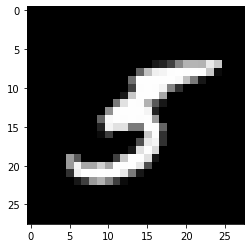

In [0]:
plt.imshow(images[1].numpy().squeeze(), cmap ='Greys_r')

In [0]:
print(images[1].numpy().shape)
print(images[1].numpy().squeeze().shape)

(1, 28, 28)
(28, 28)


In [0]:
def activation(x):
  return 1/(1 +torch.exp(-x))

#flattening
inputs = images.view(images.shape[0], -1)
# images.view(images.shape[0], -1) 

# creating the paramters.
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 =torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2)+b2

In [0]:
print(out.shape)

torch.Size([64, 10])


In [0]:
#softmax

def softmax(x):
  return torch.exp(x) / torch.sum(torch.exp(x), dim =1).view(-1,1)
  # dim 1=1 , for rows.

In [0]:
probabilities = softmax(out)

In [0]:
probabilities.shape

torch.Size([64, 10])

In [0]:
probabilities.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

# Building Networks with pytorch `nn` module

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()

    #inpput to hidden
    self.hidden = nn.Linear(784,256)
    #hidden to output
    self.output = nn.Linear(256,10)

    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    # passing input tensor through each operations
    x= self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x=self.sigmoid(x)

    return x



In [0]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

### Using functional

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden = nn.Linear(784,256)
    self.output = nn.Linear(256,10)

  def forward(self,x):
    x = F.sigmoid(self.hidden(x))
    x = F.softmax(self.output(x), dim =1)
    return x

In [0]:
# building the sequential model

In [0]:
model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10))

criterian = nn.CrossEntropyLoss()

# get the images and its labels
images, labels = next(iter(trainloader))

#flatten
images = images.view(images.shape[0], -1)

#forward pass
logits = model(images)
#caluclate the loss
loss = criterian(logits, labels)

print(loss)

tensor(2.2939, grad_fn=<NllLossBackward>)


In [0]:
# netowkr with log softmax output


model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterian = nn.NLLLoss()

# get the images and its labels
images, labels = next(iter(trainloader))

#flatten
images = images.view(images.shape[0], -1)

#forward pass
logits = model(images)
#caluclate the loss
loss = criterian(logits, labels)

print(loss)

tensor(2.2886, grad_fn=<NllLossBackward>)


In [0]:
print('Before Backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before Backward pass: 
 None
After backward pass: 
 tensor([[-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [-0.0045, -0.0045, -0.0045,  ..., -0.0045, -0.0045, -0.0045],
        [-0.0009, -0.0009, -0.0009,  ..., -0.0009, -0.0009, -0.0009],
        ...,
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [0]:
from torch import optim 
optimizer = optim.SGD(model.parameters(), lr =0.01)


1. Mkae a forward pass
2. Calculate the loss
3. perform the backward pass with `loss.backward()`
4. train using optimizer

In [0]:
# traning for a single pass -> example

print('Initial Weights - ', model[0].weight)
images, labels = next(iter(trainloader))
images.resize_(64, 784)

# clearing grad
optimizer.zero_grad()

#forward pass
output = model.forward(images)
loss = criterian(output, labels)
loss.backward()
print('Gradeint -', model[0].weight.grad)

Initial Weights -  Parameter containing:
tensor([[-0.0098,  0.0020,  0.0301,  ...,  0.0177, -0.0239, -0.0229],
        [ 0.0284, -0.0210, -0.0069,  ..., -0.0270,  0.0146, -0.0011],
        [-0.0183, -0.0308,  0.0057,  ...,  0.0243,  0.0282, -0.0149],
        ...,
        [ 0.0035,  0.0022,  0.0206,  ..., -0.0224, -0.0261, -0.0202],
        [ 0.0001,  0.0221, -0.0348,  ..., -0.0268, -0.0046,  0.0143],
        [ 0.0331, -0.0136,  0.0167,  ...,  0.0185,  0.0240, -0.0094]],
       requires_grad=True)
Gradeint - tensor([[ 0.0016,  0.0016,  0.0016,  ...,  0.0016,  0.0016,  0.0016],
        [-0.0086, -0.0086, -0.0086,  ..., -0.0086, -0.0086, -0.0086],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        ...,
        [-0.0010, -0.0010, -0.0010,  ..., -0.0010, -0.0010, -0.0010],
        [-0.0028, -0.0028, -0.0028,  ..., -0.0028, -0.0028, -0.0028],
        [-0.0001, -0.0001, -0.0001,  ..., -0.0001, -0.0001, -0.0001]])


In [0]:
optimizer.step()
print('updated weight', model[0].weight)

updated weight Parameter containing:
tensor([[-0.0099,  0.0020,  0.0301,  ...,  0.0177, -0.0239, -0.0229],
        [ 0.0285, -0.0209, -0.0068,  ..., -0.0269,  0.0147, -0.0010],
        [-0.0183, -0.0308,  0.0057,  ...,  0.0244,  0.0282, -0.0149],
        ...,
        [ 0.0035,  0.0022,  0.0206,  ..., -0.0224, -0.0261, -0.0201],
        [ 0.0002,  0.0221, -0.0347,  ..., -0.0268, -0.0046,  0.0143],
        [ 0.0331, -0.0136,  0.0167,  ...,  0.0185,  0.0240, -0.0094]],
       requires_grad=True)


In [0]:
# training 

model = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))

criterian = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003)
epochs =5
for e in range(epochs):
  running_loss =0 
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterian(output, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(f"training loss :{running_loss /len(trainloader)}")
  

training loss :1.8811899527812055
training loss :0.8548393096051999
training loss :0.523025865652668
training loss :0.43002903567893164
training loss :0.3869176794852275
